# Import  needed libraries

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')
print('setup com')

setup com


In [2]:
Gold_prices_data=pd.read_csv('/kaggle/input/gold-price-data/gld_price_data.csv')
Gold_prices_data.head(4)

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299


In [3]:
Gold_prices_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


# Data processing

In [4]:
print('The nomber of rows are', Gold_prices_data.shape[0])
print('The nomber of columns are', Gold_prices_data.shape[1])

The nomber of rows are 2290
The nomber of columns are 6


In [5]:
Gold_prices_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [6]:
Gold_prices_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


# Uni_variate analysis

<AxesSubplot:xlabel='GLD', ylabel='Count'>

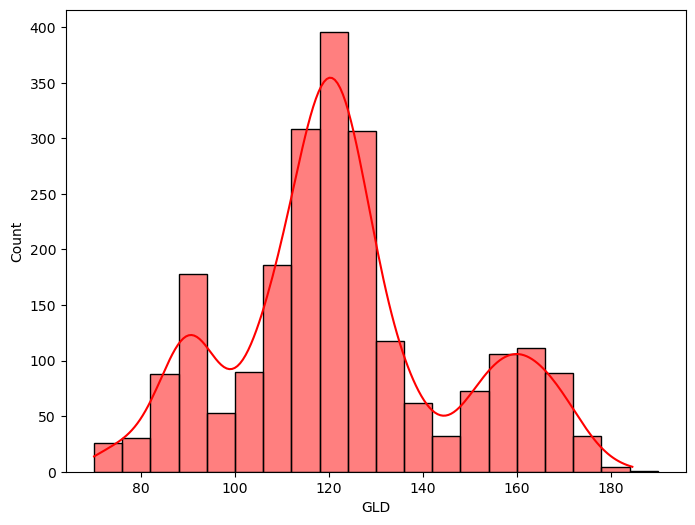

In [8]:
#gold prices distribution
plt.figure(figsize=(8,6))
sns.histplot(x='GLD',kde=True, data=Gold_prices_data,color='r',binwidth=6)

<AxesSubplot:xlabel='Date', ylabel='GLD'>

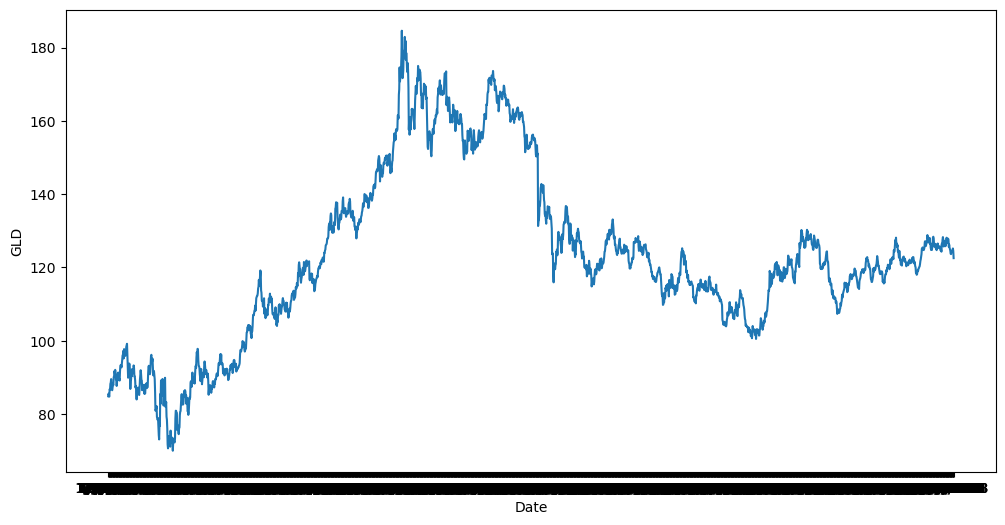

In [9]:
#Gold prices change over years
plt.figure(figsize=(12,6))
sns.lineplot(x='Date',y='GLD',data=Gold_prices_data)

# Bi_Variate analysis

<AxesSubplot:xlabel='SPX', ylabel='GLD'>

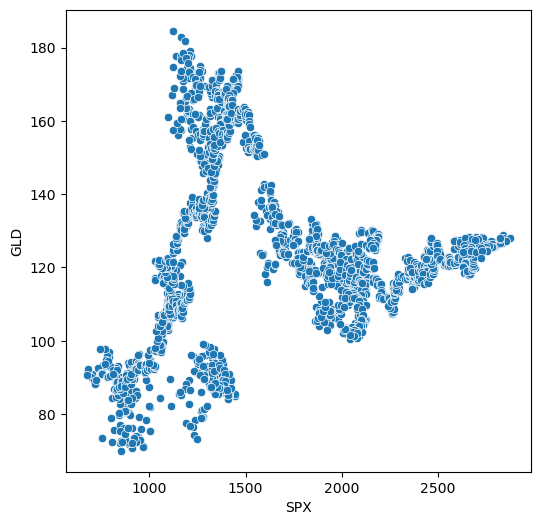

In [12]:
plt.figure(figsize=(6,6))
sns.scatterplot(x='SPX',y='GLD',data=Gold_prices_data)

<AxesSubplot:xlabel='USO', ylabel='GLD'>

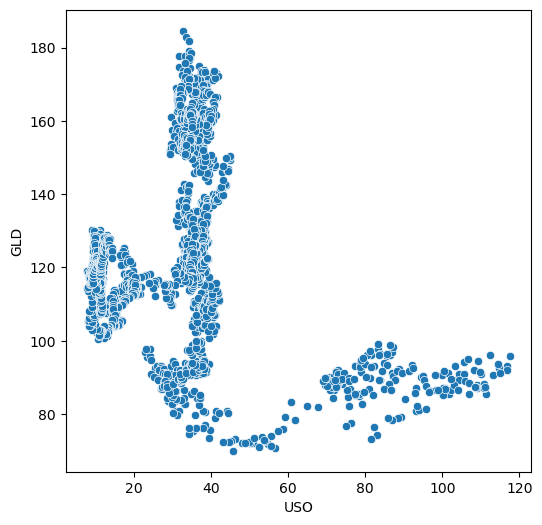

In [13]:
plt.figure(figsize=(6,6))
sns.scatterplot(x='USO',y='GLD',data=Gold_prices_data)

<AxesSubplot:xlabel='SLV', ylabel='GLD'>

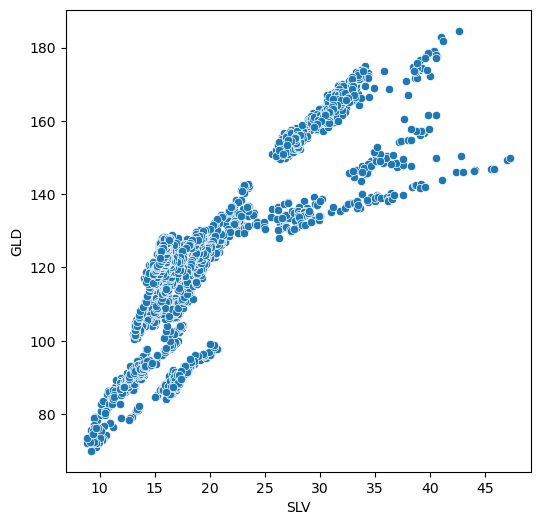

In [14]:
plt.figure(figsize=(6,6))
sns.scatterplot(x='SLV',y='GLD',data=Gold_prices_data)

<AxesSubplot:xlabel='EUR/USD', ylabel='GLD'>

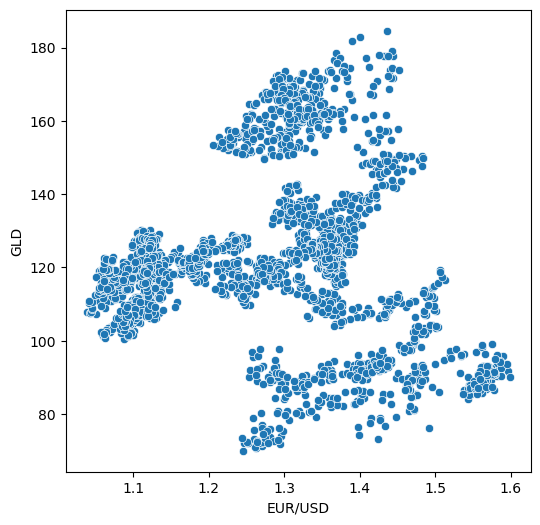

In [15]:
plt.figure(figsize=(6,6))
sns.scatterplot(x='EUR/USD',y='GLD',data=Gold_prices_data)

#### It seems that silver prices just have a positive correlation with gold prices

In [16]:
correlations = Gold_prices_data.corr()
correlations

,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


<AxesSubplot:>

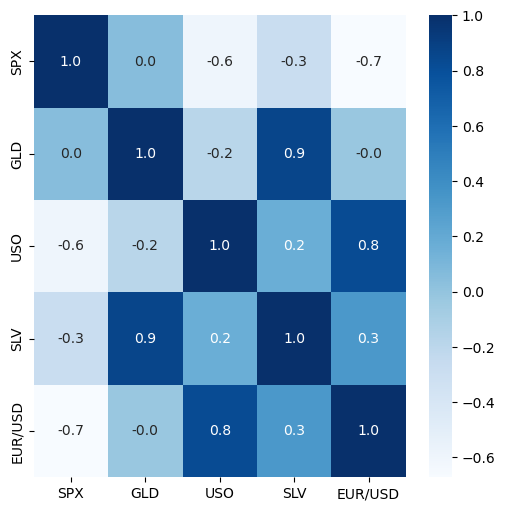

In [22]:
plt.figure(figsize=(6,6))
sns.heatmap(correlations,annot=True,fmt='.1f',cmap='Blues')

# Data Modeling

In [24]:
#Assign features and target data 
x=Gold_prices_data.drop(columns=['Date','GLD'])
y=Gold_prices_data['GLD']

In [33]:
#Splitting data into training and test data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=56)

In [34]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1832, 4)
(1832,)
(458, 4)
(458,)


### Let's build a predictive model of gold prices using RandomForest Regressor

In [38]:
model=RandomForestRegressor(n_estimators=100)

In [39]:
#traing the model 
model.fit(x_train,y_train)

RandomForestRegressor()

In [40]:
#making predictions
model_predicts= model.predict(x_test)

### making evaluations for the model predictions


In [47]:
# 1. Using R squared error
error_score = metrics.r2_score(y_test, model_predicts)
print("R squared error : ", error_score)

R squared error :  0.9892277674479557


### Compare the Actual Values and Predicted Values in a Plot

In [50]:
y_test = list(y_test)

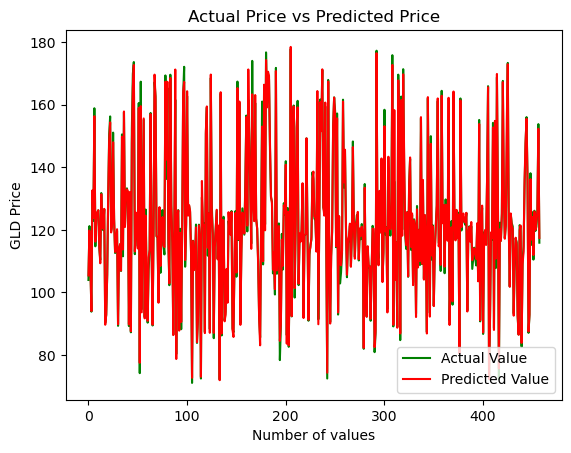

In [51]:
plt.plot(y_test, color='green', label = 'Actual Value')
plt.plot(model_predicts, color='red', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

# Almost identical 